# Deep Learning: Assignment 1. Cat, Dog, Car or Bike?

**Dataset:** You are provided with a dataset which contains more than 3000 pictures with either a cat, a dog, a motorbike or a car. The dataset has already been split in training, test and validation sets. Your task is to build and train a CNN which is able to recognize which object is depicted in the picture. To this end, you must use and change the code we presented during our tutorial on classifying cat and dog images. You should copy and unzip the dataset in your local directory (do not change the name of the directory), namely the same directory where this jupyter notebook is going to be stored. 

**Python and Keras version.** We recommend you to use Python 3.6 (there might be some incompatibility issues between keras and the most recent versions of Python). We also recommend to use TensorFlow 2.1.0 and Keras 2.3.1, which are the settings we used to test everything. You can find the documentation for keras at the following address https://keras.io/layers/convolutional/.

**What to submit:** You should post on moodle this jupyter notebook filled will all the answers to the questions, the Python code and the plots. Do not change any part of the code that is provided to you, unless explicitly asked. You should also post on moodle the model for question 5 (name of the model "modelQ5.h1"). The answers to the questions should be provided below at the end of the notebook. In case your model has size larger than 100MB please provide a link to Google Drive or other storage services. **Important**: For each question you will get 0 points if the code or any of the plots are missing or the code is not correct.

**GPU Farm**: You will have access to the HKU GPU farm to do this assignment. Additional info on how to use it is contained in a separate document provided with the assignement. Please use this only for questions 4 and 5.

**Image Size** You should use image size 32x32 for the first three questions. You can use higher resolutions for questions 4 and 5. We kindly ask you to use your machine whenever possible, in order to avoid the GPU farm to be overwhelmed. 



##### Question 1 (CNN Architecture) 

Define a CNN architecture with the following layers stacked on top of each other in the following order:
1. A convolutional layer with 32 5 × 5 filters. 
2. A max Pooling Layer with size 2 × 2.
3. A convolutional layer with 64 5 × 5 filters. 
4. A max Pooling Layer with size 2 × 2.
5. A convolutional layer with 64 3 × 3 filters. 
6. A max Pooling Layer with size 2 × 2.
7. A convolutional layer with 64 3 × 3 filters. 
7. A max Pooling Layer with size 2 × 2.
9. A dense layer with 256 units.
10. A dense layer with k units and softmax (aka cross entropy) loss function.

Use the sigmoid activation function for all layers but the last one which uses the softmax function. Use default values for the parameters which are not specified above.

a) [5pts] Determine the right value for k and write the value for k you use at the end of the notebook. Write the code to solve a) in the cell below


In [81]:
#documentation:https://keras.io/layers/convolutional/
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3)))

#write your own code for a) here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_115/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_115/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [3,3,64,64].

b) [5pts] The architecture defined above cannot be built because of an error. You should fix such an error without changing the number of convolutional, pooling or dense layers, the number of filters, the size of the filters, or the number of units. Write at the end of the notebook which strategy did you use and write the code to solve b) in the cell below:

In [3]:
#documentation:https://keras.io/layers/convolutional/
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3)))

#write your own code for b) here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='sigmoid', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

## Question 2 (Training a small CNN from scratch)

We are now considering a different CNN architecture specified in the code below. Fill the missing parts (there is a comment specifying which parts must be filled). After that train such a CNN using the following values for the parameters:

- loss function=crossentropy;
- optimizer RMSprop with learning rate = 0.1;
- metrics= accuracy;
- Batch size for the training/validation generators=20; 
- epochs=30.

Train the CNN and plot both the training/validation accuracy and training/validation loss as a function of the epochs. Write the code and report the plots in the cells below:

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
84/84 [==============================] - 3s 25ms/step - loss: 25.4580 - acc: 0.2627 - val_loss: 23.6128 - val_acc: 0.2898
Epoch 2/30
84/84 [==============================] - 2s 23ms/step - loss: 21.6695 - acc: 0.2651 - val_loss: 36.6691 - val_acc: 0.2898
Epoch 3/30
84/84 [==============================] - 2s 23ms/step - loss: 22.1116 - acc: 0.2567 - val_loss: 16.1435 - val_acc: 0.2647
Epoch 4/30
84/84 [==============================] - 2s 23ms/step - loss: 22.7914 - acc: 0.2490 - val_loss: 21.3806 - val_acc: 0.2359
Epoch 5/30
84/84 [==============================] - 2s 23ms/step - loss: 22.4133 - acc: 0.2454 - val_loss: 16.5078 - val_acc: 0.2898
Epoch 6/30
84/84 [==============================] - 2s 23ms/step - loss: 21.9612 - acc: 0.2454 - val_loss: 20.0887 - val_acc: 0.2898
Epoch 7/30
84/84 [==============================] - 2s 23ms/step - loss: 22.2971 - acc: 0.2507 - val_loss: 21.7348 - va

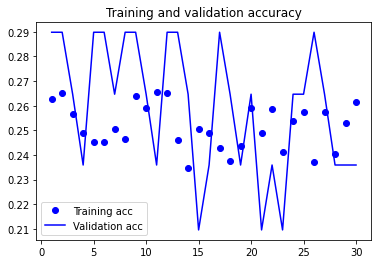

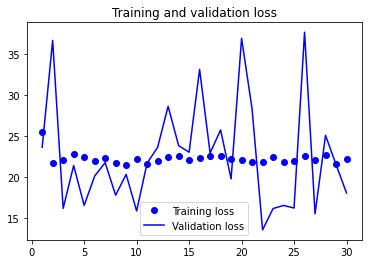

In [69]:
import os
from keras import layers
from keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # something is missing here 
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax')) #replace k with the corresponding value

model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=0.1),
            metrics=['acc'])
    

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')


history = model.fit(
      train_generator,
      #steps_per_epoch=80,
      epochs=30,
      validation_data=validation_generator,
      #validation_steps=40
)
    
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

a) [5pts] What is the main problem for your model?

1. Overfitting
2. Underfitting

Write your answer below at the end of the notebook. 


b) [5pts] Without changing the learning rate, change one hyperparameter so as to improve the training error. 

Which hyperparameters did you change? Write your answer below at the end of the notebook. 

Plot both the training/validation accuracy and training/validation loss as a function of the epochs. Report the plots and the code in the cells below.


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
84/84 [==============================] - 3s 25ms/step - loss: 2643258.5000 - acc: 0.2633 - val_loss: 2.5631 - val_acc: 0.2970
Epoch 2/30
84/84 [==============================] - 2s 23ms/step - loss: 1.7230 - acc: 0.2669 - val_loss: 1.4126 - val_acc: 0.2096
Epoch 3/30
84/84 [==============================] - 2s 23ms/step - loss: 5.1981 - acc: 0.2627 - val_loss: 1.5756 - val_acc: 0.2359
Epoch 4/30
84/84 [==============================] - 2s 23ms/step - loss: 1.4645 - acc: 0.2591 - val_loss: 1.3819 - val_acc: 0.2647
Epoch 5/30
84/84 [==============================] - 2s 23ms/step - loss: 1.3936 - acc: 0.2704 - val_loss: 1.3859 - val_acc: 0.2898
Epoch 6/30
84/84 [==============================] - 2s 23ms/step - loss: 1.3893 - acc: 0.2669 - val_loss: 1.3982 - val_acc: 0.2647
Epoch 7/30
84/84 [==============================] - 2s 23ms/step - loss: 1.3898 - acc: 0.2824 - val_loss: 1.3806 - val_acc: 0

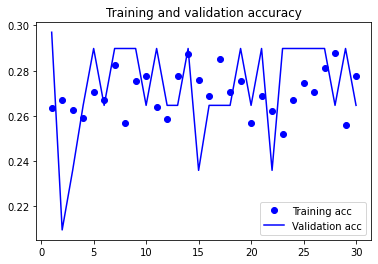

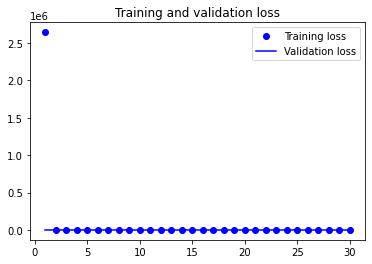

In [5]:
import os
from keras import layers
from keras import models
from tensorflow.keras import optimizers

# fill this part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # something is missing here 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=0.1),
            metrics=['acc'])
    

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')


history = model.fit(
      train_generator,
#      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
#      validation_steps=50
)
    
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Question 3 (Optimize the learning rate) 

a)[10pts] Determine an interval [a,b] of possible values for the learning rate, which is “wide enough”. In particular, you should try to guarantee that your interval contains an optimal value for the learning rate. At the same time the interval that you provided should not be too wide, due to efficiency reasons. In particular, your interval [a,b] should be such that $\frac{b}{a} \leq 10^5$.

b)[15pts] Provide a "good" value for the learning rate. In particular, the training error should become smaller than 0.1 within 30 epochs. 

Write your answers below at the end of the notebook.

Using a good value for the the learning rate, plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:


In [16]:
#testing learning rate from 0.1 to 0.00001
import numpy as np
print(np.geomspace(0.00001, 0.1,num=5))


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Learning Rate:  1e-05 Training loss:  0.8337575793266296
Learning Rate:  0.0001 Training loss:  0.33509185910224915
Learning Rate:  0.001 Training loss:  0.04357624426484108
Learning Rate:  0.01 Training loss:  0.6685633659362793
Learning Rate:  0.1 Training loss:  1.3887488842010498
Good Learning Rate:  0.001


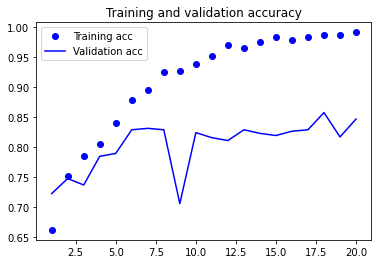

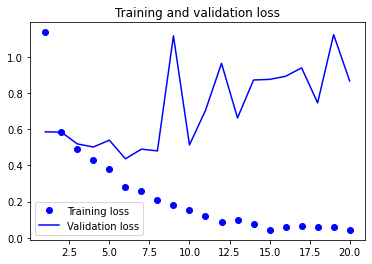

In [6]:
import os
import numpy as np
from keras import layers
from keras import models
from tensorflow.keras import optimizers
# from keras.applications import VGG16  # For Keras 2.3.1
import matplotlib.pyplot as plt
    
# fill this part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # something is missing here 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

    

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')

#Testing learning rate from 0.1 to 0.00001
learingratetest = np.geomspace(0.00001, 0.1,num=5)
acc = [1000]

for LRN in learingratetest:
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=LRN),
                metrics=['acc'])

    history = model.fit(
          train_generator,
          epochs=20,
          validation_data=validation_generator,
          verbose=0)
   
    print("Learning Rate: ", LRN, "Training loss: ", history.history['loss'][-1])
    if history.history['loss'][-1] < loss[-1]:
        goodlr = LRN
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

print("Good Learning Rate: ", goodlr)
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



## Question 4 (Transfer Learning) [25pts]

Use the VGG16 as feature extractor with data augmentation (i.e. remove the top layer and freeze the VGGnet). Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots and the code in the cells below. You should try to achieve a validation accuracy of at least 96\%. Report the accuracy of your model on the test set. 

Write the answers below at the end of the notebook. 


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
53/53 [==============================] - 15s 278ms/step - loss: 0.5559 - acc: 0.7982 - val_loss: 0.1924 - val_acc: 0.9437
Epoch 2/30
53/53 [==============================] - 15s 277ms/step - loss: 0.1987 - acc: 0.9319 - val_loss: 0.1234 - val_acc: 0.9569
Epoch 3/30
53/53 [==============================] - 15s 277ms/step - loss: 0.1462 - acc: 0.9546 - val_loss: 0.0975 - val_acc: 0.9689
Epoch 4/30
53/53 [==============================] - 15s 277ms/step - loss: 0.1151 - acc: 0.9570 - val_loss: 0.0932 - val_acc: 0.9677
Epoch 5/30
53/53 [==============================] - 15s 279ms/step - loss: 0.0911 - acc: 0.9713 - val_loss: 0.0842 - val_acc: 0.9713
Epoch 6/30
53/53 [==============================] - 15s 278ms/step - loss: 0.0850 - acc: 0.9719 - val_loss: 0.0842 - val_acc: 0.9725
Epoch 7/30
53/53 [==============================] - 15s 278ms/step - loss: 0.0815 - acc: 0.9737 - val_loss: 0.0874 - va

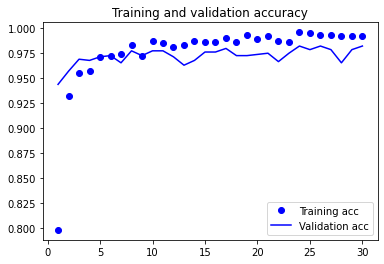

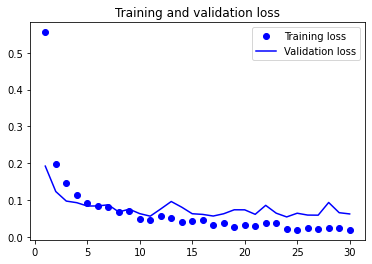

In [5]:
import os
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
# from keras.applications import VGG16  # For Keras 2.3.1

# fill this part
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(256, 256, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(learning_rate=1e-4),
            metrics=['acc'])

    
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')


history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Question 5 (Open Question) [25pts]

Use any of the techniques we saw during our course so as to improve the validation accuracy of your CNN. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots and the code in the cells below. You should try to achieve a validation accuracy of at least 98\% and in any case better than the validation accuracy provided in question 4. Report the accuracy of your model on the test set. 

Write the answers below at the end of the notebook. Your model should have max size of 300Mb. Submit your model on moodle.

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/50
53/53 [==============================] - 18s 300ms/step - loss: 0.2728 - acc: 0.9331 - val_loss: 0.0241 - val_acc: 0.9916
Epoch 2/50
53/53 [==============================] - 16s 293ms/step - loss: 0.0370 - acc: 0.9875 - val_loss: 0.0197 - val_acc: 0.9928
Epoch 3/50
53/53 [==============================] - 16s 295ms/step - loss: 0.0171 - acc: 0.9946 - val_loss: 0.0130 - val_acc: 0.9928
Epoch 4/50
53/53 [==============================] - 16s 293ms/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.0084 - val_acc: 0.9952
Epoch 5/50
53/53 [==============================] - 16s 294ms/step - loss: 0.0125 - acc: 0.9976 - val_loss: 0.0186 - val_acc: 0.9952
Epoch 6/50
53/53 [==============================] - 16s 293ms/step - loss: 0.0282 - acc: 0.9946 - val_loss: 0.0155 - val_acc: 0.9940
Epoch 7/50
53/53 [==============================] - 16s 295ms/step - loss: 0.0074 - acc: 0.9970 - val_loss: 0.0146 - va

C:\Users\wmhhe\anaconda3\envs\mlkeras\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


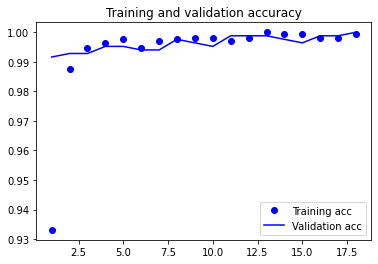

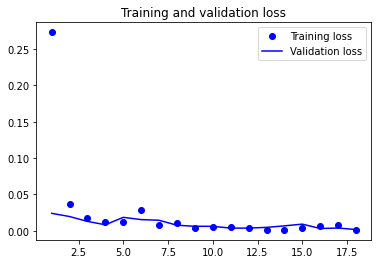

In [5]:
import os
import tensorflow as tf
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50V2

# fill this part
conv_base = ResNet50V2(weights='imagenet',
                  include_top=False, 
                  input_shape=(262, 262, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(learning_rate=1e-4),
            metrics=['acc'])

    
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(262, 262),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(262, 262),
        batch_size=32,
        class_mode='categorical')

callback = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=5, restore_best_weights=True)

history = model.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator,
      callbacks=[callback])

model.save('modelQ5.h1') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Answers

Write your answers next to the corresponding question (same line).

Question 1
* a) What is the right value of k?
4

* b) How did you fix the error in the architecture? 
Add padding in Conv2D Layer

Question 2
* a) There was a problem of underfitting or overfitting? 
Underfitting

* b) Which hyperparameter did you change? 
Change activation function to 'relu', as 'sigmoid' is not suitable for multi-class classification. By doing so, val loss decrease from 18.0272 to 1.3867.

Question 3
* a) which interval for the learning rate did you consider? 
0.1 - 0.00001

* b) which value for the learning rate did you consider? 
0.001 with training loss of 0.04357624426484108

Question 4
* a) what is the validation accuracy of your model? 
0.9820
* b) what is the test accuracy of your model? 
0.9922

Question 5
* a) what is the validation accuracy of your model? 
0.9988
* b) what is the test accuracy of your model? 
1.0000


